# **TITANIC MACHINE LEARNING FROM DISASTER**

# Table of Contents
* [1. Introduction](#introduction)
* [2. Loading the data](#loading-data)
* [3. Feature Classification: Categorical vs Numerical](#feature-classification)
* [4. Exploratory Data Analysis (EDA)](#eda)
* [5. Feature Engineering & Data Wrangling](#feature-engineer)
* [6. Preproceesor pipeline](#preprocessor)
* [7. Model training](#model-training)
## 1. Introduction 
<a class="anchor" id = "introduction"></a>
👋🛳️ Ahoy, welcome to Kaggle! You’re in the right place.
This is the legendary Titanic ML competition – the best, first challenge for you to dive into ML competitions and familiarize yourself with how the Kaggle platform works.

If you want to talk with other users about this competition, come join our Discord! We've got channels for competitions, job postings and career discussions, resources, and socializing with your fellow data scientists. Follow the link here: https://discord.gg/kaggle

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

Read on or watch the video below to explore more details. Once you’re ready to start competing, click on the "Join Competition button to create an account and gain access to the competition data. Then check out Alexis Cook’s Titanic Tutorial that walks you through step by step how to make your first submission!
## 2. Loading the data 
<a class="anchor" id="loading-data"></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.set_index("PassengerId", inplace=True)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test_df = pd.read_csv("./data/test.csv", index_col="PassengerId")
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


## 3. Feature Classification: Categorical vs Nummerical 
<a class="anchor" id="feature-classification"></a>

In [10]:
train_df.Survived = train_df.Survived.astype(dtype="category")
feature_category = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]
def convert_category(df, features):
    for feature in features:
        df[feature] = df[feature].astype("category")
convert_category(train_df, feature_category)
convert_category(test_df, feature_category)

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    category
 1   Name      418 non-null    object  
 2   Sex       418 non-null    category
 3   Age       332 non-null    float64 
 4   SibSp     418 non-null    category
 5   Parch     418 non-null    category
 6   Ticket    418 non-null    object  
 7   Fare      417 non-null    float64 
 8   Cabin     91 non-null     object  
 9   Embarked  418 non-null    category
dtypes: category(5), float64(2), object(3)
memory usage: 22.7+ KB


### 3.1 Distribution of Numerical feature value across the sample

In [13]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


### 3.2 Distribution of Categorical feature

In [14]:
train_df.describe(include="category")

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


In [15]:
test_df.describe(include="category")

,Pclass,Sex,SibSp,Parch,Embarked
count,418,418,418,418,418
unique,3,2,7,8,3
top,3,male,0,0,S
freq,218,266,283,324,270


## 4. Exploratory Data Analysis (EDA)
<a class="anchor" id="eda"></a>
Correlating categorical features

### 4.1 EDA for Categorical features
Target variable: Survived

In [16]:
train_df.Survived.value_counts().to_frame()

,count
Survived,
0,549
1,342


In [17]:
train_df.Survived.value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [18]:
train_df.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

Visualization for Survival, Sex

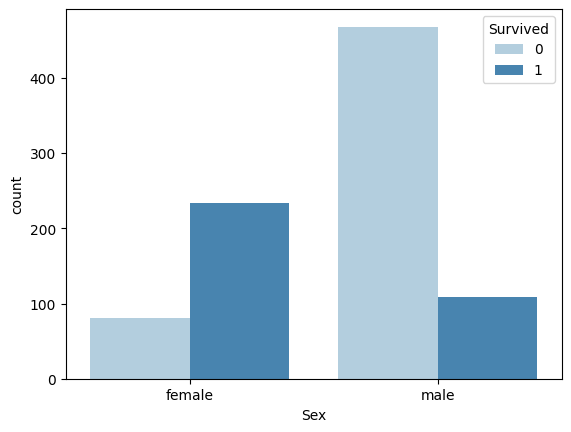

In [19]:
sns.countplot(data=train_df, x="Sex", hue="Survived", palette="Blues");

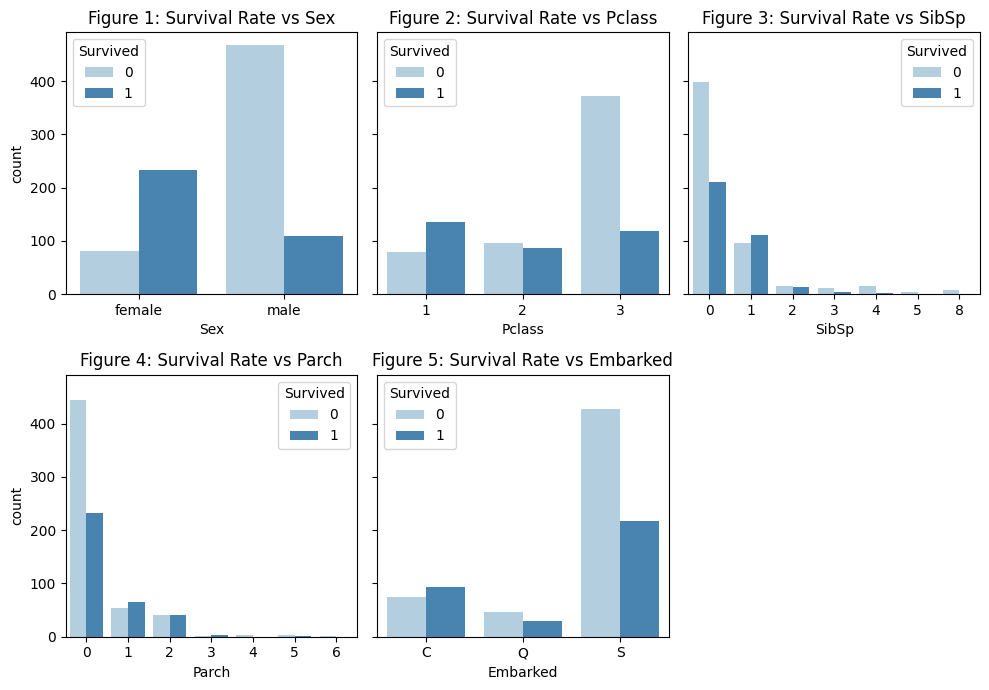

In [20]:
cols = ["Sex", "Pclass", "SibSp", "Parch", "Embarked"]
n_rows = 2
n_cols = 3
fig, ax = plt.subplots(n_rows, n_cols, figsize=(10, 7), sharey=True)
for r in range(n_rows):
    for c in range(n_cols):
        i = r *n_cols + c
        ax_i = ax[r,c]
        if i < len(cols):
            sns.countplot(data=train_df, x=cols[i], hue="Survived", palette="Blues", ax=ax_i)
            ax_i.set_title(f"Figure {i+1}: Survival Rate vs {cols[i]}")
ax.flat[-1].set_visible(False)
plt.tight_layout()

### 4.2 EDA for Numerical Features

Age

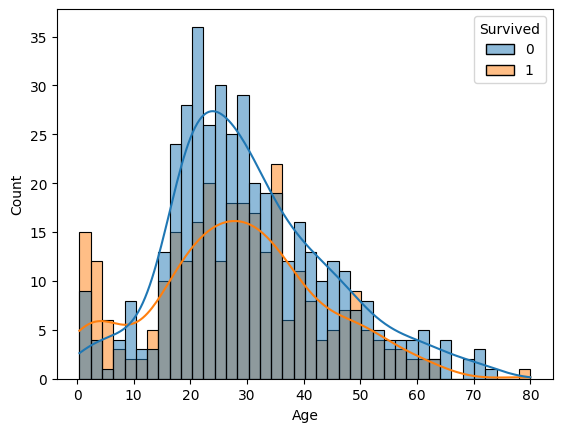

In [21]:
sns.histplot(data=train_df, x="Age", hue="Survived", bins=40, kde=True);

Fare

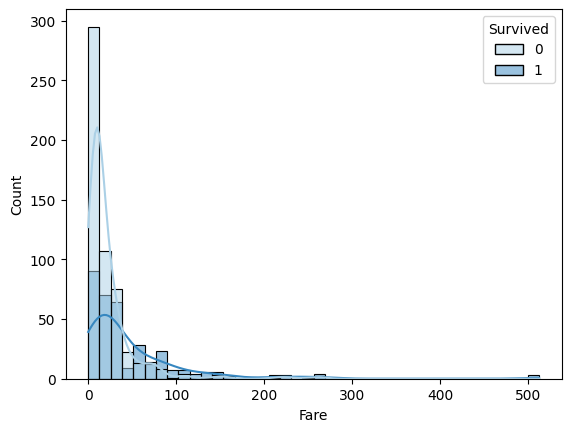

In [22]:
sns.histplot(data=train_df, x="Fare", hue="Survived", bins=40, kde=True, palette="Blues");

In [23]:
train_df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

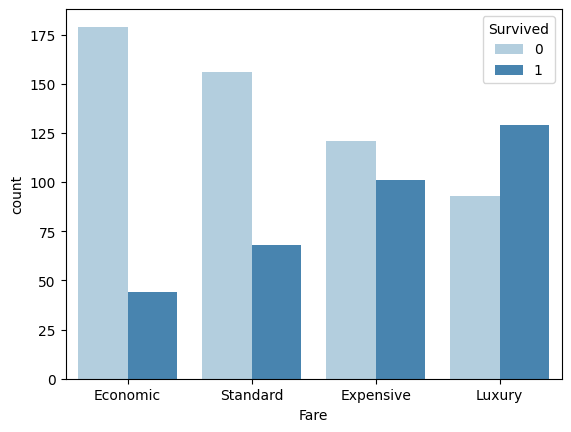

In [24]:
#Divide to Fare for 0-25% quartile, 25-50, 50-75, 75-100
fare_labels = ["Economic", "Standard", "Expensive", "Luxury"]
quartile_data = pd.qcut(train_df.Fare, q=4, labels=fare_labels)
sns.countplot(x=quartile_data, hue=train_df.Survived, palette="Blues");

## 5. Feature Engineering & Data Wrangling 
<a class='anchor' id="feature-engineer"></a>
### 5.1 Feature Engineering
#### 5.1.1 Regular expression for `Name` feature

In [25]:
train_df.Name.head(10)

PassengerId
1                               Braund, Mr. Owen Harris
2     Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                Heikkinen, Miss. Laina
4          Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                              Allen, Mr. William Henry
6                                      Moran, Mr. James
7                               McCarthy, Mr. Timothy J
8                        Palsson, Master. Gosta Leonard
9     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [26]:
import re #regular regression
def extract_title(name):
    p = re.compile(r",([\w\s]+)\.")
    return p.search(name).groups(1)[0].strip()

train_df["Title"]=train_df.Name.apply(lambda name: extract_title(name))
test_df["Title"]=test_df.Name.apply(lambda name: extract_title(name))

In [27]:
train_df["Title"].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

In [28]:
def group_title(title):
    if title in ["Mr", "Miss", "Mrs", "Master"]:
        return title
    elif title=="Ms":
        return "Miss"
    else:
        return "Other"
train_df["Title"] = train_df["Title"].apply(lambda title: group_title(title))
test_df["Title"]=test_df["Title"].apply(lambda title: group_title(title))

In [29]:
train_df.Title.value_counts()

Title
Mr        517
Miss      183
Mrs       125
Master     40
Other      26
Name: count, dtype: int64

In [30]:
train_df[train_df.Name.str.contains("Mrs. Martin")].Name

PassengerId
514    Rothschild, Mrs. Martin (Elizabeth L. Barrett)
Name: Name, dtype: object

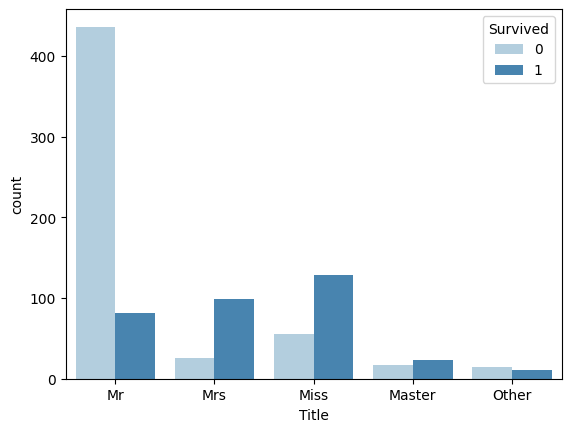

In [31]:
sns.countplot(x="Title", data=train_df, hue="Survived", palette="Blues");

#### 5.1.2 Combine `SibSp`, `Parch` to `Family` feature

In [32]:
train_df["Family_size"] = train_df["SibSp"].astype("int") + train_df["Parch"].astype("int") + 1
test_df["Family_size"]= test_df["SibSp"].astype("int") + test_df["Parch"].astype("int") + 1

In [33]:
train_df.Family_size.value_counts()

Family_size
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

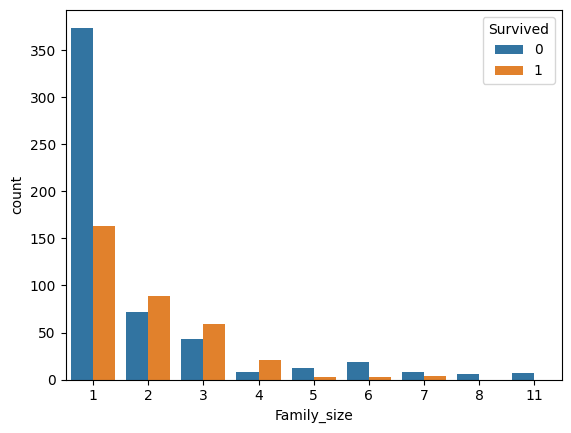

In [34]:
sns.countplot(data=train_df, x="Family_size", hue="Survived");

Combine value family_size to family_cat: `(0, 1]: solo, (1,4]: small, (4, 6]: medium, (6,20]: large family`

In [35]:
train_df["Family_cat"] = pd.cut(train_df.Family_size, bins=[0, 1, 4, 6, 20], labels=["solo", "small", "medium", "large"])
test_df["Family_cat"] = pd.cut(test_df.Family_size, bins=[0, 1, 4, 6, 20], labels=["solo", "small", "medium", "large"])

In [36]:
train_df["Family_cat"].value_counts()

Family_cat
solo      537
small     292
medium     37
large      25
Name: count, dtype: int64

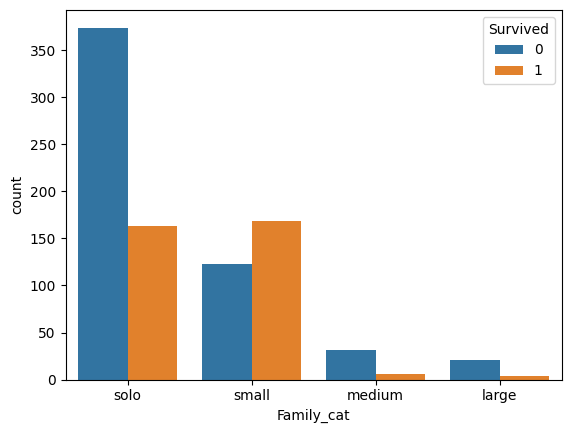

In [37]:
sns.countplot(x="Family_cat", hue="Survived", data=train_df);

### 5.2 Data Wrangling

In [38]:
num_features = ["Age", "Fare"]
cat_features = ["Sex", "Pclass", "Family_cat", "Title", "Embarked"]
col_features = num_features + cat_features
print(col_features)

['Age', 'Fare', 'Sex', 'Pclass', 'Family_cat', 'Title', 'Embarked']


In [39]:
def count_missingvalue(df, features):
    for col in features:
        missing_value = df[col].isna().sum()
        if missing_value > 0:
            print(f"Column {col} have {missing_value} missing value, ({missing_value*100/len(df):.2f}%).")
count_missingvalue(train_df, col_features)
count_missingvalue(test_df, col_features)

Column Age have 177 missing value, (19.87%).
Column Embarked have 2 missing value, (0.22%).
Column Age have 86 missing value, (20.57%).
Column Fare have 1 missing value, (0.24%).


#### Filling missing value in Age with group of Sex and Pclass

In [40]:
age_by_sex_pclass = train_df.groupby(["Sex", "Pclass"], observed=False)["Age"].median()

In [41]:
age_by_sex_pclass

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [42]:
train_df['Age']=train_df.groupby(["Sex", "Pclass"], observed=False)["Age"].transform(lambda x: x.fillna(x.median()))
test_df['Age']=test_df.groupby(["Sex", "Pclass"], observed=False)["Age"].transform(lambda x: x.fillna(x.median()))

In [43]:
count_missingvalue(train_df, col_features)
count_missingvalue(test_df, col_features)

Column Embarked have 2 missing value, (0.22%).
Column Fare have 1 missing value, (0.24%).


In [44]:
# X data and y target
X = train_df[col_features]
y = train_df["Survived"]

In [45]:
X_test=test_df[col_features]

## 6. Preprocessor pipeline 
<a class="anchor" id="preprocessor"></a>

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [47]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [48]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Family_cat', 'Title',
                                  'Embarked'])])

In [49]:
X = preprocessor.transform(X)

In [50]:
X_test = preprocessor.transform(X_test)

In [51]:
# X -> X_train, X_val
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8)

## 7. Model Training
<a class="anchor" id="model-training"> </a>

In [52]:
X_train.shape, X_val.shape, X_test.shape

((712, 19), (179, 19), (418, 19))

In [53]:
y_train.shape ,y_val.shape

((712,), (179,))

### 7.1 Logistic Regression

In [54]:
#binary classification
from sklearn.preprocessing import PolynomialFeatures
# sklearn model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# sklearn evaluate
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score

In [55]:
log_reg = LogisticRegression(solver="liblinear", max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [56]:
log_reg.score(X_val, y_val)

0.8100558659217877

In [57]:
pred_y=log_reg.predict(X_val)
precision_score(pred_y, y_val), recall_score(pred_y, y_val)

(np.float64(0.6896551724137931), np.float64(0.7142857142857143))

In [58]:
classification_report(pred_y, y_val)

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       123
           1       0.69      0.71      0.70        56

    accuracy                           0.81       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.81      0.81      0.81       179



### 7.2 Polynomial Feature

In [59]:
poly_feature = PolynomialFeatures(degree=3)
poly_feature_X_train = poly_feature.fit_transform(X_train)
poly_feature_X_val = poly_feature.transform(X_val)
poly_feature_X_train.shape

(712, 1540)

In [60]:
poly_log_reg = LogisticRegression(solver="liblinear", max_iter=1000)
poly_log_reg.fit(poly_feature_X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [61]:
poly_log_reg.score(poly_feature_X_val, y_val)

0.7821229050279329

Comment: increase degree of linear model --> reduce evaluation score :((

### 7.3 Decision Tree vs Random Forest

In [62]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=8, random_state=2)
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=2)

In [63]:
tree.score(X_val, y_val)

0.7597765363128491

In [64]:
rd_forest = RandomForestClassifier(n_estimators=1000)
rd_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [65]:
rd_forest.score(X_val, y_val)

0.7877094972067039

### 7.4 Cross Validation (K-fold)

In [66]:
from sklearn.model_selection import cross_val_score

In [67]:
log_reg_cv = LogisticRegression(solver="liblinear", max_iter=1000)
rd_forest_cv = RandomForestClassifier(n_estimators=100)

In [68]:
lr_scores = cross_val_score(log_reg_cv, X, y, scoring="accuracy", cv=5)
lr_scores.mean(), lr_scores.std()

(np.float64(0.826031008725127), np.float64(0.020466357172416235))

In [69]:
rf_scores = cross_val_score(rd_forest_cv, X, y, scoring="accuracy", cv=5)
rf_scores.mean(), lr_scores.std()

(np.float64(0.800207143305505), np.float64(0.020466357172416235))

## 8. Baseline Model Comparison

In [89]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
# from xgboost import XGBClassifier  # !pip install xgboost
seed=10
models=[
    LinearSVC(max_iter=15000, random_state=seed),
    SVC(random_state=seed),
    KNeighborsClassifier(metric='minkowski', p=2),
    LogisticRegression(solver='liblinear', max_iter=1000),
    DecisionTreeClassifier(criterion="entropy", max_depth=8, random_state=seed),
    RandomForestClassifier(n_estimators=1000, random_state=seed),
    GradientBoostingClassifier(),
    ExtraTreesClassifier(),
    AdaBoostClassifier(algorithm='SAMME')    
]

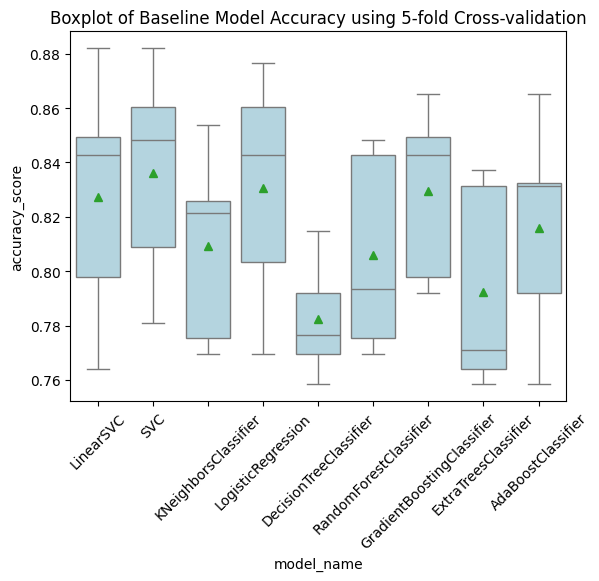

,Mean,Standard Diviation
model_name,,
SVC,0.836112,0.040705
LogisticRegression,0.830494,0.043541
GradientBoostingClassifier,0.829383,0.032546
LinearSVC,0.827136,0.046324
AdaBoostClassifier,0.815919,0.041261
KNeighborsClassifier,0.809190,0.035834
RandomForestClassifier,0.805850,0.037291
ExtraTreesClassifier,0.792392,0.038536
DecisionTreeClassifier,0.782274,0.021813


In [91]:
from sklearn.model_selection import StratifiedKFold
def generate_baseline_results(models, X, y, metrics, cv=5, plot_results=False):
    #define K-fold
    kfold = StratifiedKFold(cv, shuffle=True, random_state=seed)
    entries=[]
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X, y, scoring="accuracy", cv=kfold)
        for index, score in enumerate(scores):
            entries.append((model_name, index, score))
    cv_df = pd.DataFrame(data=entries, columns=["model_name", "fold_index", "accuracy_score"])
    if plot_results:
        sns.boxplot(data=cv_df, x="model_name", y="accuracy_score", showmeans=True, color="lightblue")
        plt.title("Boxplot of Baseline Model Accuracy using 5-fold Cross-validation")
        plt.xticks(rotation=45)
        plt.show()

    # Summary results
    mean = cv_df.groupby("model_name")["accuracy_score"].mean()
    std = cv_df.groupby("model_name")["accuracy_score"].std()
    baseline_result = pd.concat([mean, std], axis=1, ignore_index=True)
    baseline_result.columns = ["Mean", "Standard Diviation"]
    baseline_result.sort_values(by=["Mean"], ascending=False, inplace=True)
    
    return baseline_result
    

generate_baseline_results(models, X, y, metrics="accuracy", cv=5, plot_results=True)